Proyek Analisis Data: Bike Sharing Dataset
Menentukan Pertanyaan Bisnis
Bagaimana pengaruh musim terhadap penyewaan sepeda?
Bagaimana tren penyewaan sepeda dalam tahun, bulan dan jam?
Bagaimana pengaruh hari libur dan hari kerja terhadap penyewaan sepeda?
Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
Bagaimana pengaruh temperatur (suhu) terhadap penyewaan sepeda?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/adibfloat/Dicoding-BADDP-Proyek-Analisis-Data/main/submission/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/adibfloat/Dicoding-BADDP-Proyek-Analisis-Data/main/submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<Berdasarkan hasil pengecekan, terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

Mengecek missing value pada data hour_df -->

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil pengecekan, terdapat kesalahan tipe data pada kolom dteday berupa object yang seharusnya datetime

Mengecek missing value pada data day_df

In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan, tidak terdapat missing value pada data hour_df

Mengecek duplikasi data pada hour_df

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan, tidak terdapat missing value pada data day_df

Mengecek duplikasi data pada day_df

In [8]:
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df:  0


Berdasarkan hasil pengecekan, tidak terdapat duplikasi data pada hour_df

Mengecek parameter statistik pada hour_df

In [9]:
print("Jumlah duplikasi pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada day_df:  0


Berdasarkan hasil pengecekan, tidak terdapat duplikasi data pada day_df

Mengecek paramter statistik pada day_df

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil pengecekan, tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil pengeckan, tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

# Cleaning Data

Memperbaiki tipe data dteday pada hour_df menjadi datetime

In [12]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Memperbaiki tipe data dteday pada day_df menjadi datetime

In [14]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# Exploratory Data Analysis (EDA)
# Explore day_df

In [16]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
280,281,2011-10-08,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235,3174,5409
18,19,2011-01-19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650
632,633,2012-09-24,4,1,9,0,1,1,1,0.514167,0.502513,0.492917,0.142404,1001,6435,7436
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
436,437,2012-03-12,1,1,3,0,1,1,1,0.466667,0.459592,0.489167,0.207713,838,4460,5298


In [17]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
day_df.loc[day_df["season"] == 1, "season"] = "Musim Semi"
day_df.loc[day_df["season"] == 2, "season"] = "Musim Panas"
day_df.loc[day_df["season"] == 3, "season"] = "Musim Gugur"
day_df.loc[day_df["season"] == 4, "season"] = "Musim Dingin"

day_df.season.value_counts().sort_index(ascending=False)

season
Musim Semi      181
Musim Panas     184
Musim Gugur     188
Musim Dingin    178
Name: count, dtype: int64

In [19]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

yr
2011    365
2012    366
Name: count, dtype: int64

In [20]:
day_df.mnth.value_counts().sort_index()

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64

In [21]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Libur"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Tidak ada hari libur"

day_df.holiday.value_counts().sort_index()

holiday
Libur                   710
Tidak ada hari libur     21
Name: count, dtype: int64

In [22]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Minggu"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Senin"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Selasa"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Rabu"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Kamis"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Jumat"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sabtu"

day_df.weekday.value_counts().sort_index()

weekday
Jumat     104
Kamis     104
Minggu    105
Rabu      104
Sabtu     105
Selasa    104
Senin     105
Name: count, dtype: int64

In [23]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Hari Libur"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Hari Bekerja"

day_df.workingday.value_counts().sort_index()

workingday
Hari Bekerja    500
Hari Libur      231
Name: count, dtype: int64

In [24]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Terang"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Berkabut"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Bersalju Tipis"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Hujan Deras"

day_df.weathersit.value_counts().sort_index()

weathersit
Berkabut          247
Bersalju Tipis     21
Terang            463
Name: count, dtype: int64

Explore hour_df

In [25]:
hour_df.hr.value_counts().sort_index()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

In [26]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Terang"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Berkabut"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Bersalju Tipis"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Hujan Deras"

hour_df.weathersit.value_counts().sort_index()

weathersit
Berkabut           4544
Bersalju Tipis     1419
Hujan Deras           3
Terang            11413
Name: count, dtype: int64

# Visualisasi & Analisis Penjelasan
# Bagaimana pengaruh musim terhadap penyewaan sepeda?

In [27]:
byseason_df = day_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "season": "musim",
    "instant": "jumlah"
}, inplace=True)
byseason_df

,musim,jumlah
0,Musim Dingin,178
1,Musim Gugur,188
2,Musim Panas,184
3,Musim Semi,181


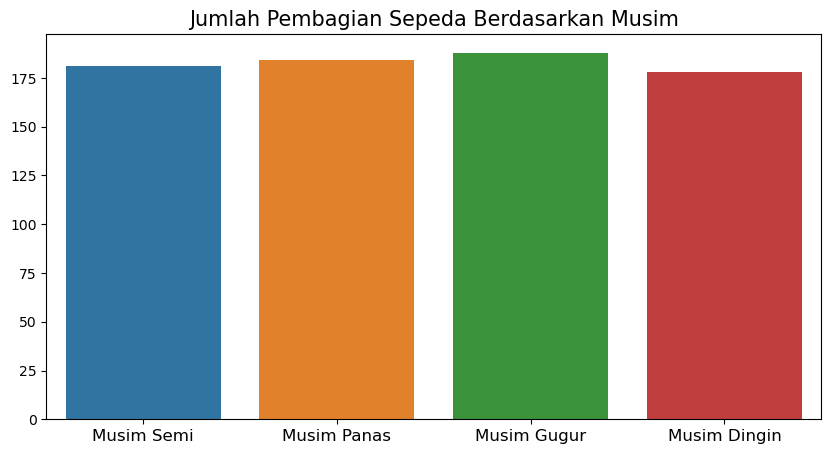

In [28]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="jumlah",
    x="musim",
    data=byseason_df.sort_values(by="musim", ascending=False)
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Bagaimana tren penyewaan sepeda dalam tahun, bulan dan jam?

In [29]:
byyear_df = day_df.groupby(by="yr").instant.nunique().reset_index()
byyear_df.rename(columns={
    "yr": "tahun",
    "instant": "jumlah"
}, inplace=True)
byyear_df

,tahun,jumlah
0,2011,365
1,2012,366


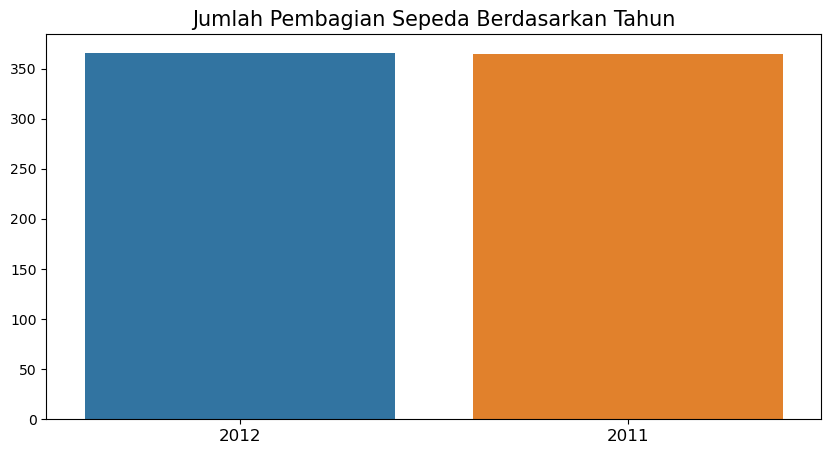

In [30]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="jumlah",
    x="tahun",
    data=byyear_df.sort_values(by="tahun", ascending=False),
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Tahun", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

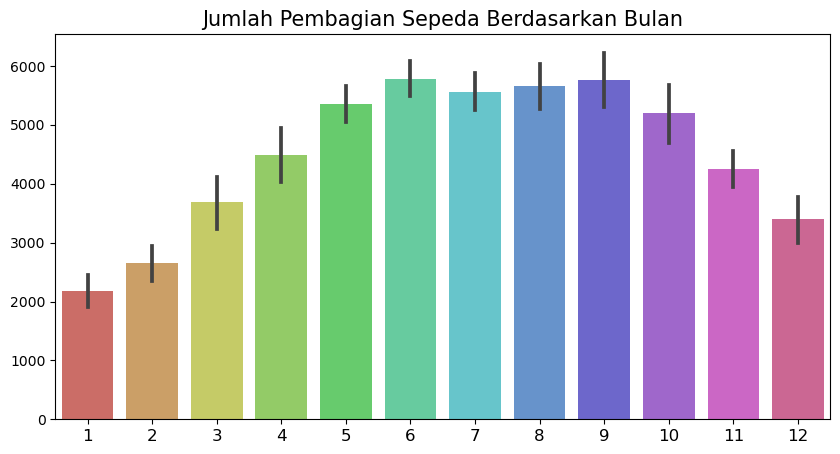

In [31]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="mnth",
    data=day_df.sort_values(by="mnth", ascending=False),
    palette="hls"
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Bulan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

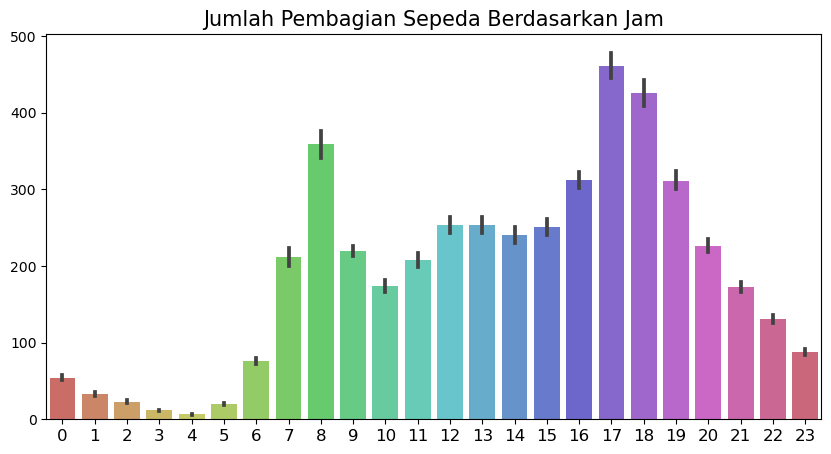

In [32]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_df.sort_values(by="hr", ascending=False),
    palette="hls"
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Jam", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [33]:
byholiday_df = day_df.groupby(by="holiday").instant.nunique().reset_index()
byholiday_df.rename(columns={
    "holiday": "hari_libur",
    "instant": "jumlah"
}, inplace=True)
byholiday_df

,hari_libur,jumlah
0,Libur,710
1,Tidak ada hari libur,21


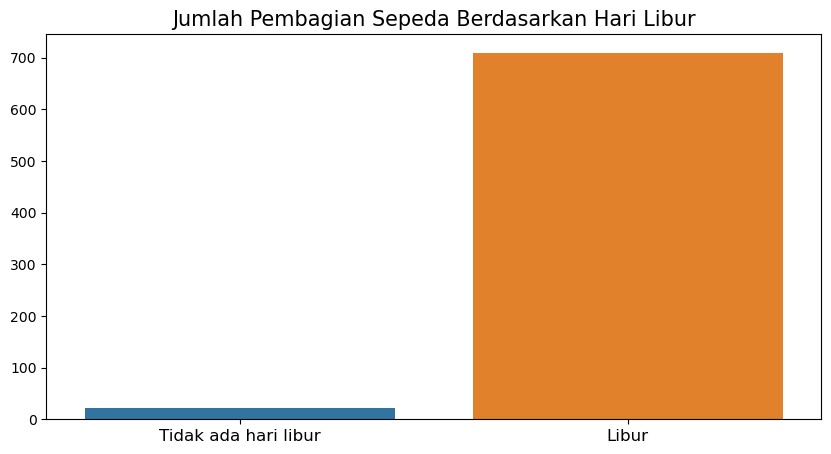

In [34]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="jumlah",
    x="hari_libur",
    data=byholiday_df.sort_values(by="hari_libur", ascending=False),
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Hari Libur", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [35]:
byworkingday_df = day_df.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_df.rename(columns={
    "workingday": "hari_kerja",
    "instant": "jumlah"
}, inplace=True)
byworkingday_df

,hari_kerja,jumlah
0,Hari Bekerja,500
1,Hari Libur,231


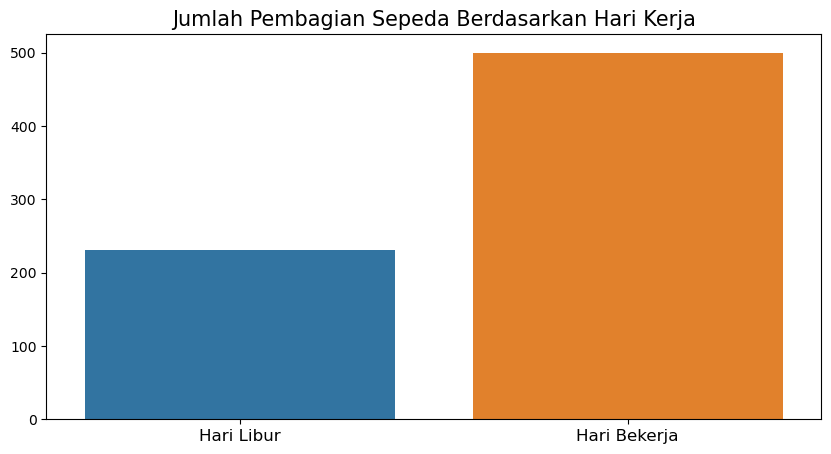

In [36]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="jumlah",
    x="hari_kerja",
    data=byworkingday_df.sort_values(by="hari_kerja", ascending=False),
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Hari Kerja", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

In [37]:
byweathersit_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byweathersit_df.rename(columns={
    "weathersit": "cuaca",
    "instant": "jumlah"
}, inplace=True)
byweathersit_df

,cuaca,jumlah
0,Berkabut,247
1,Bersalju Tipis,21
2,Terang,463


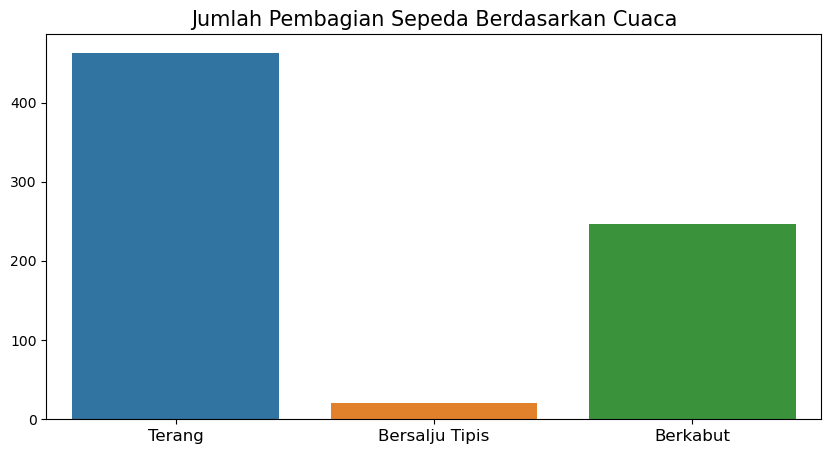

In [38]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="jumlah",
    x="cuaca",
    data=byweathersit_df.sort_values(by="cuaca", ascending=False),
)
plt.title("Jumlah Pembagian Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Bagaimana pengaruh temperatur (suhu) terhadap penyewaan sepeda?

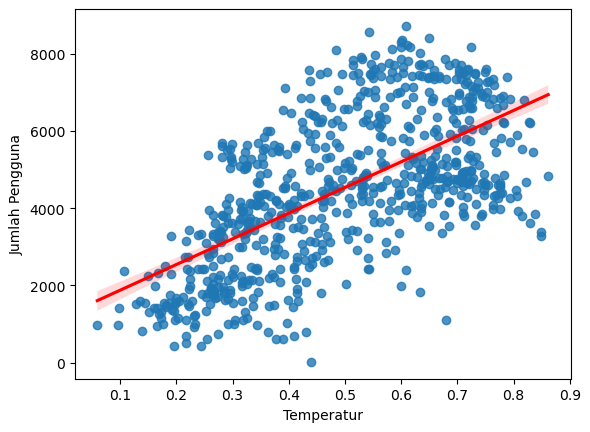

In [39]:
sns.regplot(
    x=day_df["temp"],
    y=day_df["cnt"],
    line_kws={"color": "r"})
plt.xlabel("Temperatur")
plt.ylabel("Jumlah Pengguna")
plt.show()

Kesimpulan
Musim gugur menunjukkan tingkat penyewaan sepeda tertinggi berdasarkan tabel byseason_df pada kolom musim dan jumlah, menunjukkan pengaruh musim gugur terhadap aktivitas penyewaan sepeda.

1. Penyewaan sepeda mencapai puncaknya pada tahun 2012 berdasarkan data dari tabel byyear_df pada kolom tahun dan jumlah.
2. Penyewaan sepeda mencapai puncaknya pada bulan Juni berdasarkan data dari tabel bymonth_df pada kolom mnth dan jumlah.
3. Penyewaan sepeda mencapai puncaknya pada jam 17 berdasarkan data dari tabel byhour_df pada kolom hr dan jumlah.
4. Penyewaan sepeda lebih tinggi pada hari libur, menunjukkan pengaruh positif hari libur terhadap aktivitas penyewaan sepeda.
5. Penyewaan sepeda lebih banyak terjadi pada hari kerja berdasarkan data dari tabel byworkingday_df. Hal ini menunjukkan pengaruh positif hari kerja terhadap aktivitas penyewaan sepeda.
Penyewaan sepeda lebih tinggi saat cuaca cerah berdasarkan data dari tabel byweathersit_df, menunjukkan pengaruh positif cuaca cerah terhadap aktivitas penyewaan sepeda.
Dari visualisasi regplot pada kolom cnt dan temp dalam tabel day_df, terlihat adanya hubungan positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak sepeda yang disewa.

# Export Dataset

In [41]:
day_df.to_csv("main_data.csv", index=False)